## Polynomial Regression

### Set up 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "polynomialRegression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Polynomial regression

### Synthetic dataset

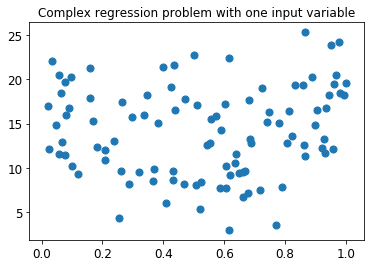

In [2]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

### Linear regression

In [3]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


### Polynomial with Linear regression

Now we transform the original input data to add polynomial features up to degree 2 (quadratic)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



### Ridge regression (regularized linear regression with L2 penalty)

- Addition of many polynomial features often leads to overfitting,
so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression.

In [5]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


## Exercise together
### Polynomial regression exercises

In [6]:
import numpy.random as rnd
np.random.seed(42)

### Synthetic dataset

This is training data
Saving figure quadratic_data_plot


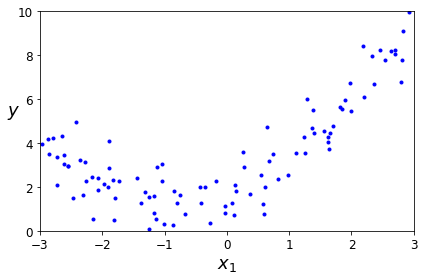

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + (2 + np.random.randn(m, 1))

print('This is training data')
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

### 1. create a set of polynomial features

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

### 2. check values of X[0] and X_poly[0]

In [26]:
print(X[0])

print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


### 3. Linear regression modeling with data polynomial attributes

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### 4. Draw regression line

Saving figure quadratic_predictions_plot


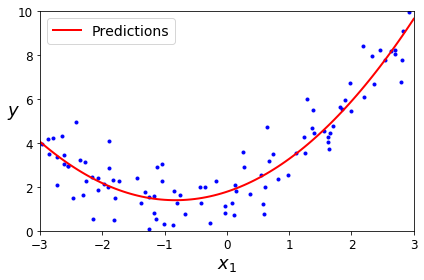

In [28]:
# new data
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# polynomial attributes from testing data
X_test_poly = poly_features.transform(X_new)

# predictve values
y_predict = lin_reg.predict(X_test_poly)

# plot training data
plt.plot(X, y, "b.")

# plot regression line
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

### 5. Learning curves

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

### Linear regression learning curve

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

### Polynomial regression learning curve

- We use Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)


plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

### High degree polynomials

- degree=1 is just linear regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_predict = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_predict, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()